# Zobaczymy jak dokonywać transformacji tekstu. 

# Zad

Na początek wczytujemy korpus z dysku. Użyjemy przykład stworzonego w poprzednim notebook-u.

In [1]:
# Nie mam oryginalnego tekstu 
# documents = ["Romeo and Juliet",
#          "Juliet: O happy dagger",
#          "Romeo died by dagger",
#          "'Live free or die', that’s the New-Hampshire’s motto",
#          "Did you know, New-Hampshire is in New-England"]

In [2]:
from gensim import corpora, models, similarities, matutils
import os 
import numpy as np
if (os.path.exists("tmp/deerwester.dict")):
    dictionary = corpora.Dictionary.load('tmp/deerwester.dict')
    corpus = corpora.MmCorpus('tmp/deerwester.mm')
    print("Used files generated from first tutorial")
else:
    print("Please run first tutorial to generate data set")



Used files generated from first tutorial


In [36]:
for d in corpus:
    print(d)

[(0, 1.0), (1, 1.0)]
[(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
[(1, 1.0), (2, 1.0), (6, 1.0), (7, 1.0)]
[(8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0)]
[(15, 1.0), (16, 1.0), (17, 1.0), (18, 1.0), (19, 1.0), (20, 1.0)]


In [37]:
scipy_csc_matrix = matutils.corpus2csc(corpus)
print(scipy_csc_matrix.todense())

[[1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


# Dokonujemy transformacji tfidf. 

Zaczynamy od policzenia wszyskich potrzebnych częstości na korpusie treningowym.

In [38]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

Możemy teraz przekonwertować dowolny dokument.

In [39]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow]) # step 2 -- use the model to transform vectors

[(0, 0.869030105092481), (1, 0.49475921056909233)]


Możemy również przetransformować cały korpus.

In [40]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.869030105092481), (1, 0.49475921056909233)]
[(2, 0.31226270667960454), (3, 0.5484803253891997), (4, 0.5484803253891997), (5, 0.5484803253891997)]
[(1, 0.3498475928479082), (2, 0.3498475928479082), (6, 0.6144970803661514), (7, 0.6144970803661514)]
[(8, 0.3779644730092272), (9, 0.3779644730092272), (10, 0.3779644730092272), (11, 0.3779644730092272), (12, 0.3779644730092272), (13, 0.3779644730092272), (14, 0.3779644730092272)]
[(15, 0.4082482904638631), (16, 0.4082482904638631), (17, 0.4082482904638631), (18, 0.4082482904638631), (19, 0.4082482904638631), (20, 0.4082482904638631)]


In [41]:
scipy_csc_matrix = matutils.corpus2csc(corpus_tfidf)
print(scipy_csc_matrix.todense())

[[0.86903011 0.         0.         0.         0.        ]
 [0.49475921 0.         0.34984759 0.         0.        ]
 [0.         0.31226271 0.34984759 0.         0.        ]
 [0.         0.54848033 0.         0.         0.        ]
 [0.         0.54848033 0.         0.         0.        ]
 [0.         0.54848033 0.         0.         0.        ]
 [0.         0.         0.61449708 0.         0.        ]
 [0.         0.         0.61449708 0.         0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.37796447 0.        ]
 [0.         0.         0.         0.         0.40824829]
 [0.         0.         0.         0.         0.40824829]
 [0.         0

In [42]:
print(dictionary.token2id)
print(dictionary.token2id.keys())

{'juliet': 0, 'romeo': 1, 'dagger': 2, 'happy': 3, 'juliet:': 4, 'o': 5, 'by': 6, 'died': 7, "'live": 8, "die',": 9, 'free': 10, 'motto': 11, 'new-hampshire’s': 12, 'or': 13, 'that’s': 14, 'did': 15, 'is': 16, 'know,': 17, 'new-england': 18, 'new-hampshire': 19, 'you': 20}
dict_keys(['juliet', 'romeo', 'dagger', 'happy', 'juliet:', 'o', 'by', 'died', "'live", "die',", 'free', 'motto', 'new-hampshire’s', 'or', 'that’s', 'did', 'is', 'know,', 'new-england', 'new-hampshire', 'you'])


# Możemy dokonać transformacji LSI

In [118]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


Wypiszemy jak wyglądają wybrane kierunki.

In [50]:
lsi.print_topics(2)

[(0,
  '0.495*"romeo" + 0.473*"juliet" + 0.396*"by" + 0.396*"died" + 0.333*"dagger" + 0.189*"o" + 0.189*"happy" + 0.189*"juliet:" + -0.000*"motto" + -0.000*"\'live"'),
 (1,
  '-0.408*"you" + -0.408*"did" + -0.408*"new-england" + -0.408*"new-hampshire" + -0.408*"know," + -0.408*"is" + 0.000*"died" + 0.000*"happy" + 0.000*"o" + 0.000*"by"')]

In [66]:
lsi.print_topics(num_topics=2, num_words=4)

[(0, '0.495*"romeo" + 0.473*"juliet" + 0.396*"by" + 0.396*"died"'),
 (1,
  '-0.408*"did" + -0.408*"you" + -0.408*"new-hampshire" + -0.408*"new-england"')]

In [67]:
lsi.get_topics()

array([[ 4.73453671e-01,  4.94934691e-01,  3.32757917e-01,
         1.88594904e-01,  1.88594904e-01,  1.88594904e-01,
         3.95884660e-01,  3.95884660e-01, -4.02224357e-16,
        -3.72631798e-16, -3.86408854e-16, -4.17107177e-16,
        -3.25113951e-16, -3.57231142e-16, -3.67171947e-16,
         4.85722573e-17,  6.24500451e-17,  4.85722573e-17,
         5.55111512e-17,  5.55111512e-17,  4.85722573e-17],
       [-5.55111512e-17, -3.31968229e-35,  9.71445147e-17,
         1.80411242e-16,  5.55111512e-17,  1.80411242e-16,
         1.38779227e-16,  1.94287681e-16,  7.89289148e-17,
         6.41619092e-17,  7.11681637e-17,  8.92872771e-17,
         7.50048633e-17,  7.49323023e-17,  7.64745915e-17,
        -4.08248290e-01, -4.08248290e-01, -4.08248290e-01,
        -4.08248290e-01, -4.08248290e-01, -4.08248290e-01]])

### PYTANIE: z jakimi słowami wiąże się pierwszy temat a z jakimi drugi?

# Zad

Proszę posortować zdania najbardziej pasujące do danego tematu. 

In [119]:
numpy_corpus = matutils.corpus2dense(corpus_lsi, num_terms=2)
print(numpy_corpus)
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[0,:]) )[::-1]
for x in docs[:5]:
    print(corpus[x])


[[ 0.65631896  0.41422966  0.7761062   0.          0.        ]
 [-0.53372806  0.84565616  0.          0.          0.        ]]
[(1, 1.0), (2, 1.0), (6, 1.0), (7, 1.0)]
[(0, 1.0), (1, 1.0)]
[(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
[(15, 1.0), (16, 1.0), (17, 1.0), (18, 1.0), (19, 1.0), (20, 1.0)]
[(8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0)]


In [120]:
topic_ind = 1
docs = np.argsort(np.abs(numpy_corpus[0,:]) )[::-1]
for x in docs[:5]:
    print(corpus[x])   

[(1, 1.0), (2, 1.0), (6, 1.0), (7, 1.0)]
[(0, 1.0), (1, 1.0)]
[(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
[(15, 1.0), (16, 1.0), (17, 1.0), (18, 1.0), (19, 1.0), (20, 1.0)]
[(8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0)]


In [71]:
documents = ["Romeo and Juliet",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

In [116]:
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[topic_ind,:]) )[::-1]
for x in docs[:5]:
#     print(corpus[x])
    print(documents[x])

Romeo died by dagger
Romeo and Juliet
Juliet: O happy dagger
Did you know, New-Hampshire is in New-England
'Live free or die', that’s the New-Hampshire’s motto


In [117]:
topic_ind = 1
docs = np.argsort( np.abs(numpy_corpus[topic_ind,:]) )[::-1]
for x in docs[:5]:
#     print(corpus[x])
    print(documents[x])

Did you know, New-Hampshire is in New-England
'Live free or die', that’s the New-Hampshire’s motto
Romeo died by dagger
Juliet: O happy dagger
Romeo and Juliet


# Zad
Zobaczmy jak wygląda reprezentacja naszych dokumentów.

In [88]:
docs_red = numpy_corpus.T
docs_red

array([[ 0.65631896,  0.        ],
       [ 0.41422966,  0.        ],
       [ 0.7761062 ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        , -1.        ]], dtype=float32)

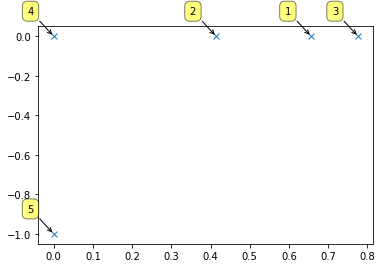

In [87]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [92]:
query = ["died", "dagger"]

In [110]:
new_vec = [dictionary.doc2bow(w.lower().split()) for w in query] 
print(new_vec) 
new_vec_tf = tfidf[new_vec]
# print
new_vec_tf_matrix = matutils.corpus2csc(new_vec_tf)
print(new_vec_tf_matrix.todense())


new_vec_tf_lsi = lsi[new_vec_tf] 
# print
new_vec_tf_lsi_matrix = matutils.corpus2dense(new_vec_tf_lsi, num_terms=2)
print(new_vec_tf_lsi_matrix)

[[(7, 1)], [(2, 1)]]
[[0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]]
[[0.39588466 0.33275792]
 [0.         0.        ]]


In [111]:
query_red = new_vec_tf_lsi_matrix.T
query_red

array([[0.39588466, 0.        ],
       [0.33275792, 0.        ]], dtype=float32)

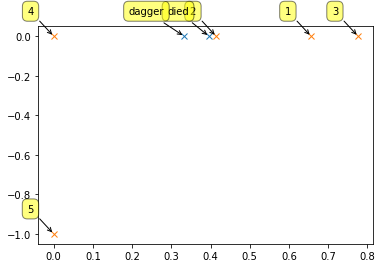

In [115]:
plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = ["died", "dagger"]
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()